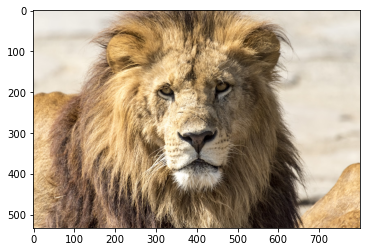

In [84]:
import torch
from PIL import Image
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt

# Load the target image and convert it to a tensor.
img = Image.open('figure/Lion.jpg')
plt.imshow(img)

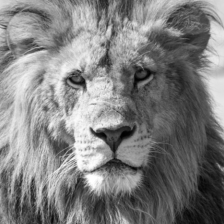

In [85]:
import torch, torchvision
from torchvision import transforms
from torch import nn

to_tensor = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.Grayscale(),
    transforms.ToTensor(),
])

to_pil = transforms.Compose([
    transforms.ToPILImage()
])

input = to_tensor(img)
to_pil(input)

torch.Size([1, 1, 224, 224])
torch.Size([1, 224, 224])


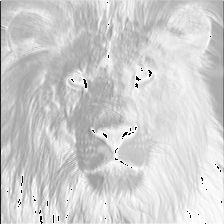

In [86]:
# https://pytorch.org/docs/master/generated/torch.nn.Conv2d.html
conv   = nn.Conv2d(1, 1, (3, 3), stride = 1, padding = 1, bias = False)
input  = input.unsqueeze(0)
output = conv(input)
print(output.shape)
print(output.data.squeeze(dim = 0).shape)
to_pil(output.data.squeeze(dim = 0))

In [87]:
def display(image1, image2):
    img1 = to_pil(torch.clamp(image1, 0, 1).data.squeeze(dim = 0))
    img2 = to_pil(torch.clamp(image2, 0, 1).data.squeeze(dim = 0))
    dst  = Image.new('RGB', (img1.width + img2.width, img1.height))
    dst.paste(img1, (0, 0))
    dst.paste(img2, (img1.width, 0))
    return dst

display(input, output)
print(conv.weight.data)
print(conv.weight.shape)

tensor([[[[-0.3059, -0.0473,  0.3131],
          [-0.0361, -0.1012, -0.0962],
          [-0.2453,  0.1143,  0.0330]]]])
torch.Size([1, 1, 3, 3])


tensor([[[[0.0000, 0.0000, 0.0000],
          [0.0000, 1.5000, 0.0000],
          [0.0000, 0.0000, 0.0000]]]])


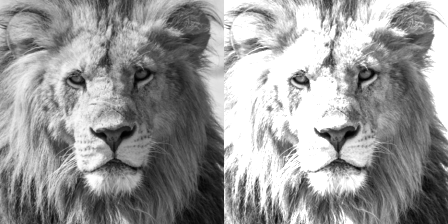

In [88]:
# bright
conv.weight.data = torch.tensor([[[
    [0., 0., 0.],
    [0., 1.5, 0.],
    [0., 0., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

tensor([[[[0.0000, 0.0000, 0.0000],
          [0.0000, 0.5000, 0.0000],
          [0.0000, 0.0000, 0.0000]]]])


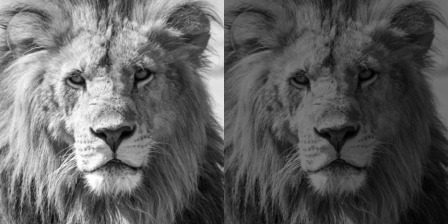

In [89]:
# dark
conv.weight.data = torch.tensor([[[
    [0., 0., 0.],
    [0., 0.5, 0.],
    [0., 0., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

tensor([[[[0.0938, 0.1562, 0.0938],
          [0.1562, 0.2812, 0.1562],
          [0.0938, 0.1562, 0.0938]]]])


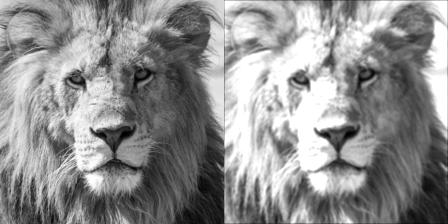

In [90]:
# Gaussian blur
conv.weight.data = torch.tensor([[[
    [1.5, 2.5, 1.5],
    [2.5, 4.5, 2.5],
    [1.5, 2.5, 1.5],
]]])/16.0
print(conv.weight.data)
output = conv(input)
display(input, output)

tensor([[[[-1., -1., -1.],
          [-1.,  8., -1.],
          [-1., -1., -1.]]]])


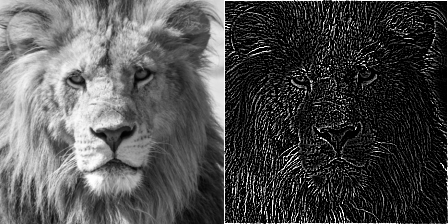

In [91]:
conv.weight.data = torch.tensor([[[
    [-1., -1., -1.],
    [-1., 8., -1.],
    [-1., -1., -1.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)